<a href="https://colab.research.google.com/github/vagmin27/DeepLearning/blob/main/NeuralNetworkInitializationWeights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Initialization weights



*   Uniform
*   Default
*   Xavier
*   He







In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [2]:
#Random initialization
xin = torch.randn(1,784)
w1 = torch.randn(784,50)
b1 = torch.randn(50)

w2 = torch.randn(50,10)
b2 = torch.randn(10)

w3 = torch.randn(10,10)
b3 = torch.randn(10)

def linear(x, w, b):
  return torch.matmul(x,w) + b

def relu(x):
  return x.clamp_min(0.)

t1 = relu(linear(xin, w1, b1))
t2 = relu(linear(t1,w2, b2))
t3 = relu(linear(t2,w3, b3))

print(t1.mean(), t1.std())
print(t2.mean(), t2.std())
print(t3.mean(), t3.std())


tensor(10.2449) tensor(14.4426)
tensor(32.8969) tensor(49.6087)
tensor(135.1737) tensor(184.2964)


In [3]:
import math

#Random initialization
xin = torch.randn(1,784)
w1 = torch.randn(784,50)*math.sqrt(2/784)
b1 = torch.randn(50)

w2 = torch.randn(50,10)*math.sqrt(2/50)
b2 = torch.randn(10)

w3 = torch.randn(10,10)*math.sqrt(2/10)
b3 = torch.randn(10)

def linear(x, w, b):
  return torch.matmul(x,w) + b

def relu(x):
  return x.clamp_min(0.)

t1 = relu(linear(xin, w1,b1))
t2 = relu(linear(t1,w2,b2))
t3 = relu(linear(t2,w3,b3))

print(t1.mean(), t1.std())
print(t2.mean(), t2.std())
print(t3.mean(), t3.std())

tensor(0.5686) tensor(0.9015)
tensor(1.0468) tensor(1.2332)
tensor(0.8287) tensor(1.0228)


In [4]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):

    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [5]:
# Define the class Net

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None

    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [6]:
 #Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss
            total+=loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
    return cost

In [7]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

Define the Neural Network with Same Weights Initialization define, Criterion Function, Optimizer and Train the Model

In [8]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [9]:
# Train the model
# size of input
D_in = 1
# size of hidden layer
H = 2
# number of outputs
D_out = 1
# learning rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)


In [10]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[0.5543],
                      [0.7354]])),
             ('linear1.bias', tensor([ 0.5831, -0.5781])),
             ('linear2.weight', tensor([[ 0.3549, -0.5106]])),
             ('linear2.bias', tensor([0.4140]))])

Let's see what happens when the weights in the same layer have the same values.
Many times when a neural network is not functioning, it has to do with the fact that the weights were not initialized correctly during the training phase of the neural network. \\
Most of the time PyTorch has done the initialization process for us under the hood. \\
Using our simple network, lets see what happens if we do not select good weights to start off with.
PyTorch randomly initializes the weights using a method we will discuss later. To understand why this is important
let's see what happens when we initialize all of the weights with the same value of one and bias to zero. \\
We will change the model parameters as follows.
We will use the simple classification problem.


In [11]:
# Same Weights Initialization with all ones for weights and zeros for the bias.
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

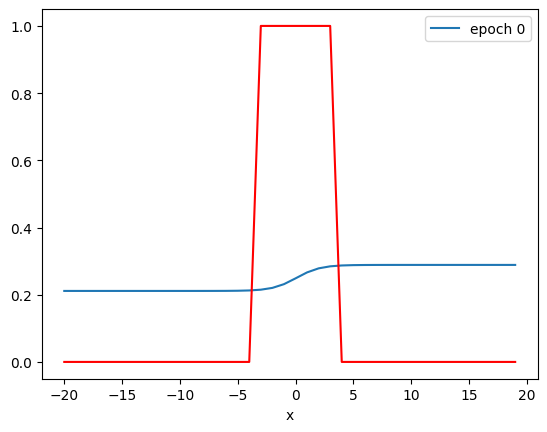

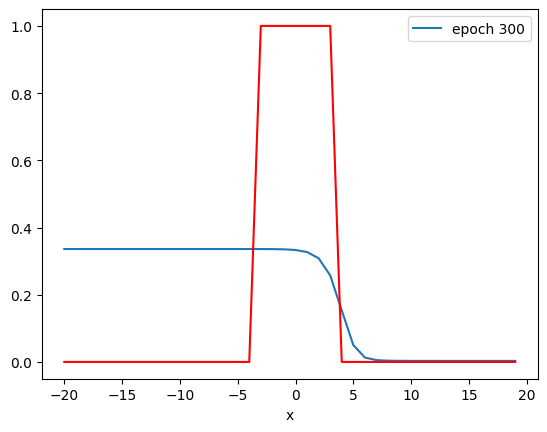

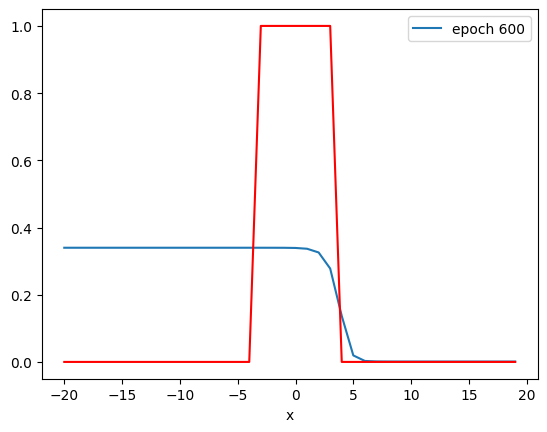

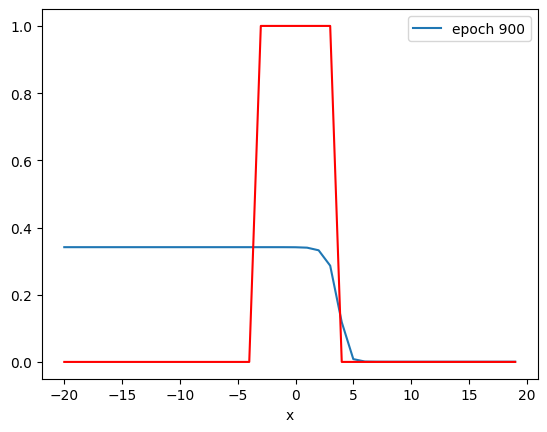

Text(0.5, 1.0, 'cross entropy loss')

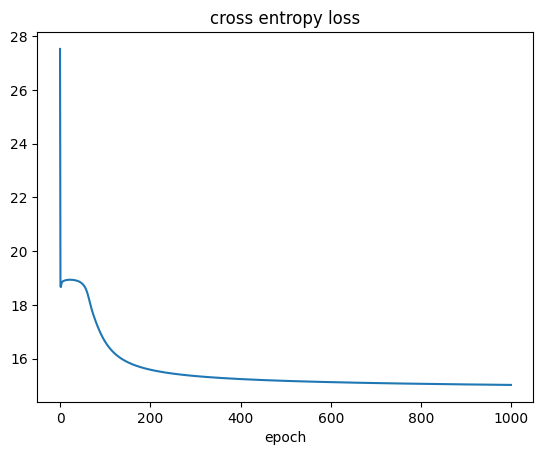

In [12]:
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [13]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9340],
                      [1.9340]])),
             ('linear1.bias', tensor([-9.0725, -9.0725])),
             ('linear2.weight', tensor([[-3.3976, -3.3976]])),
             ('linear2.bias', tensor([-0.6546]))])

After we train our model, we see that our model does a horrible job of predicting the decision function.
Examining the model parameters we see that the weight in the same layer has the same value.
For example the linear weights for the first layer for each neuron are the same. Similarly for the second layer.
This is because each neuron will have the same output and such have the same gradian update.

As a result it is recommended that we randomly initialize our parameters.

In [14]:
# Train the model
# size of input
D_in = 1
# size of hidden layer
H = 2
# number of outputs
D_out = 1
# learning rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)

model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.9254],
                      [ 0.1459]])),
             ('linear1.bias', tensor([0.4112, 0.1085])),
             ('linear2.weight', tensor([[-0.4349, -0.1655]])),
             ('linear2.bias', tensor([0.0624]))])

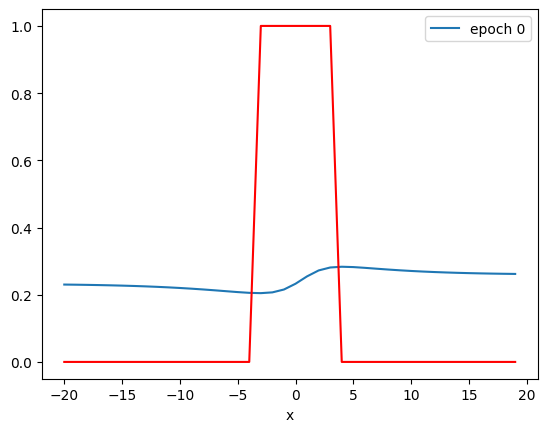

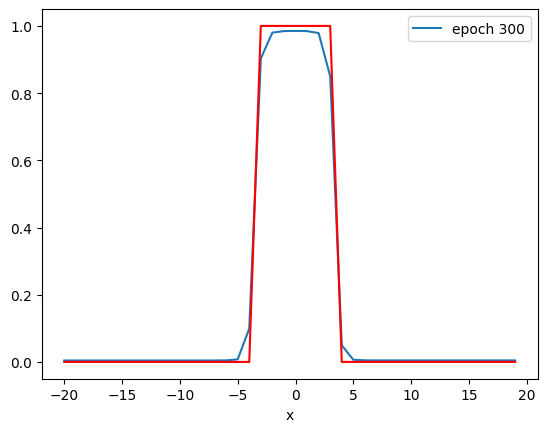

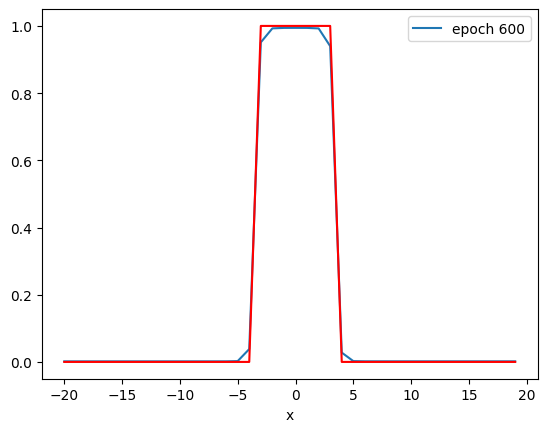

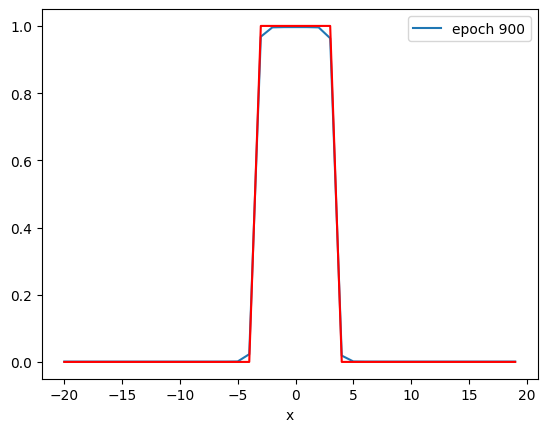

Text(0.5, 1.0, 'cross entropy loss')

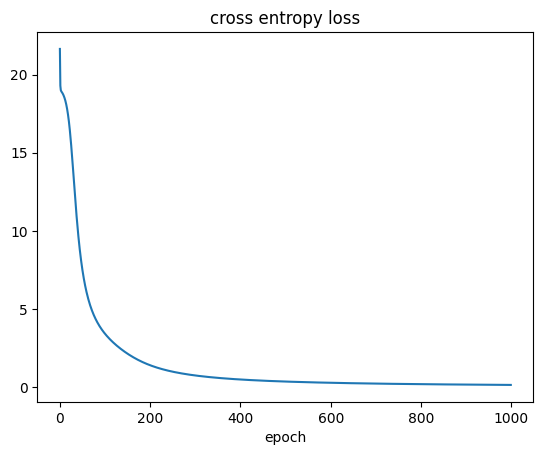

In [15]:
# Repeat the previous steps above by using the MSE cost or total loss:
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

# Test Uniform, Default and Xavier Initialization on MNIST dataset with tanh activation

In [17]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [18]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [19]:
# Define the neural network with Default initialization

class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [20]:
 #Define the neural network with Xavier initialization

class Net_Xavier(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [21]:
## He initialization

class Net_He(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [22]:
# function to Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy

In [23]:
# Create the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.50MB/s]


In [24]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [25]:
# Create Dataloader for both train dataset and validation dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [26]:
# Define criterion function

criterion = nn.CrossEntropyLoss()

In [27]:
# Set the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

#Test PyTorch Uniform Initialization, Default Initialization, Xavier Initialization, He Initialization


We initialize our parameters by sampling from the uniform distribution,
this distribution has a constant probability in a specified range in this case from -1 to 1.
That means any value between -1 to 1 can be sampled with equal probability.
A value of -1 may be randomly selected, with equal probability value of 0 may be randomly selected.
Also we could select a value of 1, the main problem is how to select the range of the uniform distribution.  

let say uniform distribution, has a narrow range between -0.05 to 0.05.
The problem is that the values that we sample is squashed between -0.05 and 0.05
which is too close together and defeats the idea of randomly sampling the values of the weights.
But there is also a problem with making the range of our distribution, too wide.
If we draw samples near the tails of the distribution,
the values will be large, this can lead to problems.
If you recall if the input to the activation is to large our gradient will vanish,


### How to fix the problem????
The idea for the solution is we scale the width of the distribution by the inverse of the number of neurons.
So if we have 2 neurons we scale the width of the distribution..
So the maximum value we can obtain is 1/sqrt(2).
Of course we can obtain samples anywhere in this interval..
If we have 4 neurons as an input we we scale the distribution by one fourth.
The maximum value we can obtain is 1/sqrt(4) of course we will not always get this value.
Let's go over the Different Initialization Methods in PyTorch.
Initializing using the Default Method.
In PyTorch by default if we use linear to create a linear object with “ L in” neurons,
we simply make the lower bound of the range of the distribution the negative of the inverse of square root of L in.
the upper bound of the range of the distribution is the positive of the inverse of square root of L in.





Initializing using the **He Method.**
He et al. (2015) proposed activation aware initialization of weights (for ReLu) that was able to resolve this problem. ReLu and leaky ReLu also solves the problem of vanishing gradient.
$(\frac{2}{size^{[l-1]}})^{\frac{1}{2}}$

He initialization: we just simply multiply random initialization with
For relu we use the He initialize method, after we create a linear object,

**Xavier Initialization** is another popular method and is used in conjunction with the tanh activation.
It takes into consideration the number of input neurons “Lin”
as well as the number of neuron in the next layer “L out”.

$(\frac{2}{size^{[l-1]} + size^{[l]}})^{\frac{1}{2}}$

These methods serve as good starting points for initialization and mitigate the chances of exploding or vanishing gradients. They set the weights neither too much bigger than 1, nor too much less than 1. So, the gradients do not vanish or explode too quickly. They help avoid slow convergence, also ensuring that we do not keep oscillating off the minima. There exist other variants of the above, where the main objective again is to minimize the variance of the parameters.


Source: Xavier  https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf ,
He https://arxiv.org/pdf/1502.01852v1.pdf


In [28]:
# Train the model with Uniform initialization

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [29]:
# Train the model with default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [31]:
# Train the model with Xavier initialization

model_Xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [32]:
model_Uniform.state_dict()

OrderedDict([('hidden.0.weight',
              tensor([[0.2799, 0.2955, 0.4862,  ..., 0.4707, 0.2427, 0.6431],
                      [0.8734, 0.7872, 0.4952,  ..., 0.9232, 0.4399, 0.3786],
                      [0.8004, 0.7810, 0.8557,  ..., 0.3034, 0.9336, 0.3886],
                      ...,
                      [0.8451, 0.4894, 0.1676,  ..., 0.3329, 0.9240, 0.9949],
                      [0.8807, 0.3266, 0.0645,  ..., 0.2459, 0.4527, 0.5789],
                      [0.6054, 0.7748, 0.3417,  ..., 0.1648, 0.5811, 0.6526]])),
             ('hidden.0.bias',
              tensor([-3.5402e-02,  1.8178e-02, -2.1709e-02, -1.1839e-02,  4.8722e-03,
                      -1.0492e-02, -1.9008e-02,  2.6994e-02, -3.4899e-02,  1.0381e-02,
                      -3.5228e-02, -5.6381e-03, -2.0134e-02, -3.0264e-02, -1.3289e-02,
                       2.5346e-02, -1.0797e-02,  2.1568e-03,  4.3630e-03, -2.1916e-02,
                       2.2670e-02, -1.5766e-02,  3.4906e-02, -2.3063e-02, -6.8216e-03,
   

In [33]:
# Train the model with the He initialization

model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs=30)

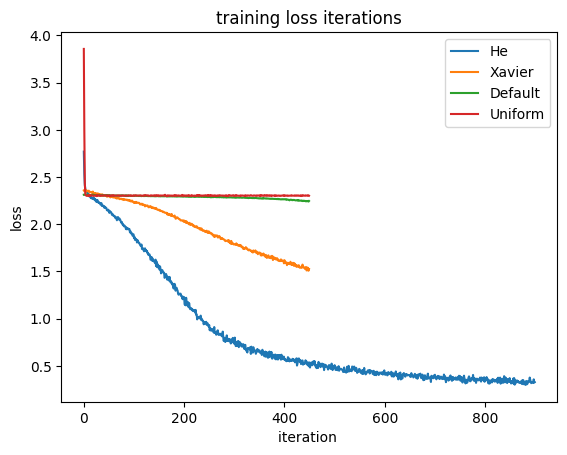

In [34]:
# Plot the loss

plt.plot(training_results_He['training_loss'], label='He')
plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

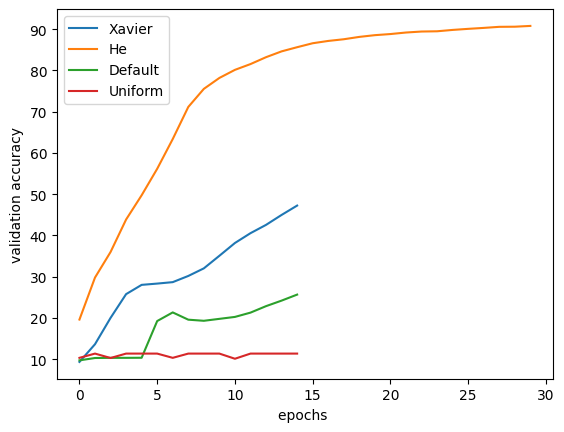

In [35]:
# Plot the accuracy
plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results_He['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()